In [8]:
import re
import numpy as np
import pandas as pd
import missingno as mno
from tqdm.notebook import tqdm

In [9]:
%%capture
tqdm.pandas()

## STR data
- eligibility and registration data from boston.gov
- applications from DoIT
- joined on geo-calced SAM_id 

In [10]:
stre = pd.read_csv('../data/census_neighborhood_groups/str_joined.csv', low_memory=0)

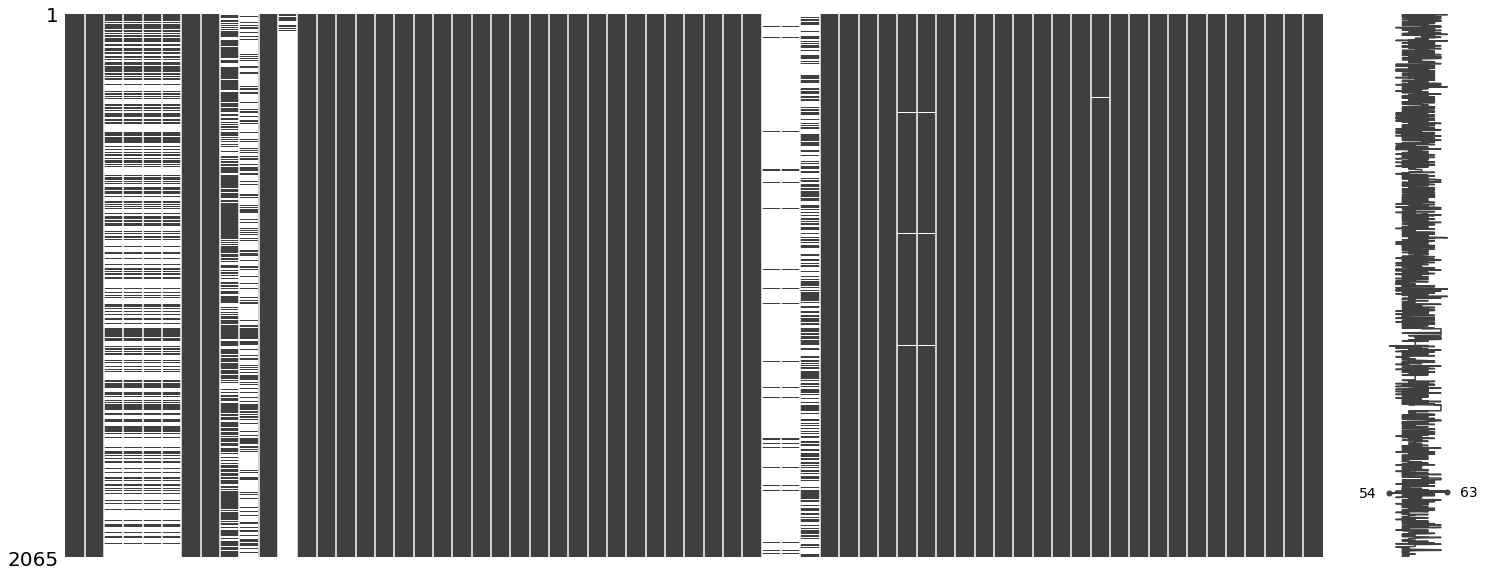

In [11]:
mno.matrix(stre);

In [12]:
def overview_and_drop_cols(df): 
    print('shape:', df.shape, '\n')
    for c in df.columns:
        missing = round(df[c].isna().sum()/len(df), 2)*100
        if missing==0: print(f'_____{c}_____')
        else: print(f'_____{c}_____ ({missing}% missing)')
        print(df[c].dtype, '|', len(df[c].unique()), 'uniques')
        print(df[c].value_counts().head())
        if len(df[c].value_counts())<2 or df[c].isna().sum()>.8*len(df) or '_COORD' in c:
            df.drop(columns=c, inplace=True)
            print('********( DROPPED )********')
        print('\n')
overview_and_drop_cols(stre)

shape: (2065, 65) 

_____SAM_id_____
int64 | 1357 uniques
318209    19
211892    12
318207    12
66913     10
46823      9
Name: SAM_id, dtype: int64


_____APP_Address_____
object | 1452 uniques
40 Temple ST 03 1 Boston MA 02114            11
15-17 Greenwood AVE 18 Hyde Park MA 02136    10
120-122 Milk ST 03 Boston MA 02109            9
476 Columbus AVE 04 Boston MA 02118           8
36 White ST 01 1 East Boston MA 02128         6
Name: APP_Address, dtype: int64


_____APP_Issued Date_____ (61.0% missing)
object | 757 uniques
12/3/2019 9:22      3
11/8/2019 11:18     3
11/8/2019 11:20     3
10/29/2019 12:03    3
1/9/2019 5:47       2
Name: APP_Issued Date, dtype: int64


_____APP_Renewal Date_____ (61.0% missing)
object | 757 uniques
9/29/2020 12:03    3
11/3/2020 9:22     3
10/9/2020 11:18    3
10/9/2020 11:20    3
10/20/2020 2:35    2
Name: APP_Renewal Date, dtype: int64


_____APP_Expire Date_____ (61.0% missing)
object | 757 uniques
10/29/2020 12:03    3
11/8/2020 11:18     3
11/8

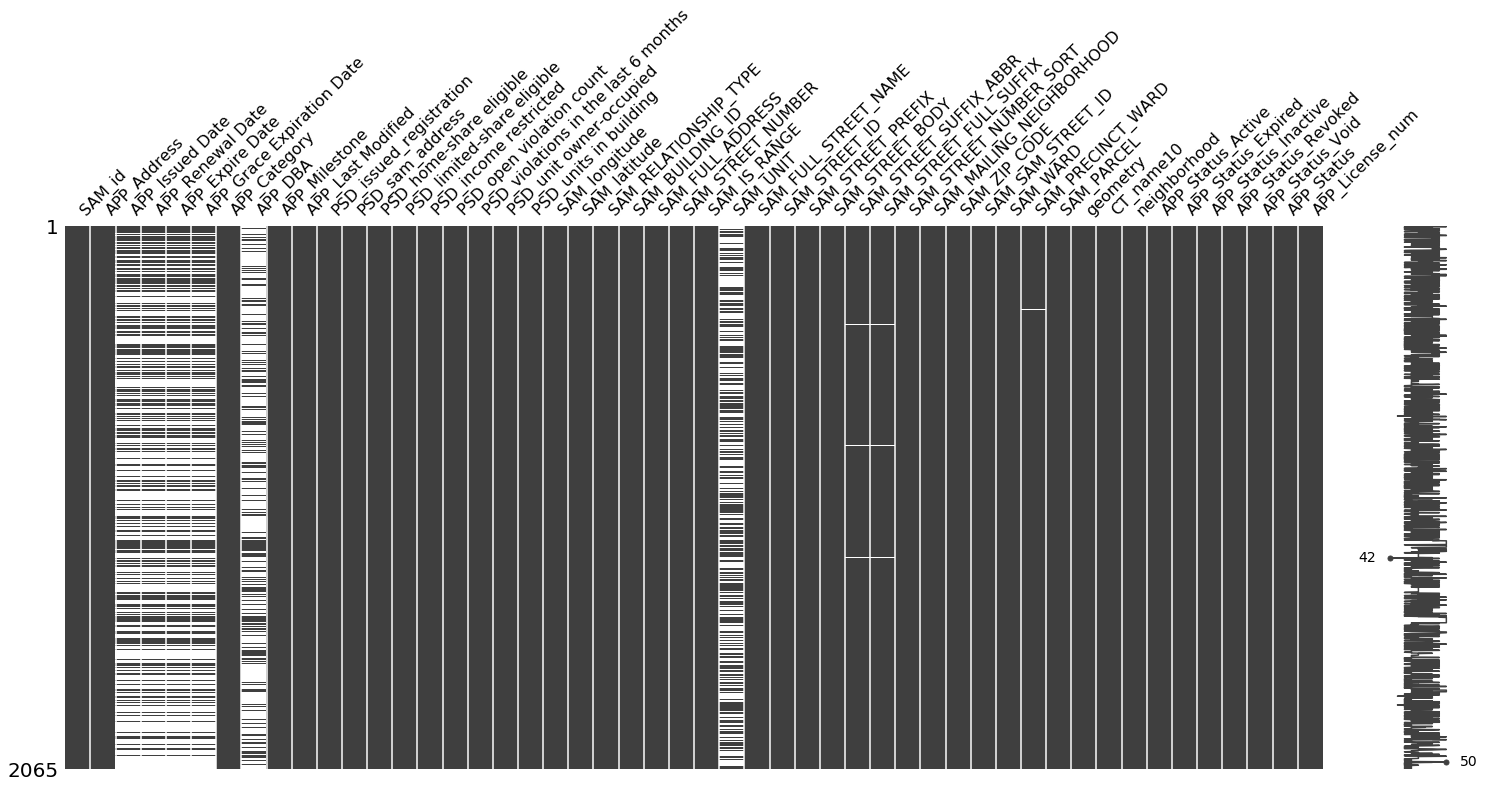

In [13]:
mno.matrix(stre);

In [14]:
stre.to_csv('stre_clean.csv', index=False)